# Donchian / Turtle Breakout (Trend Following) — 2800.HK

- Logic: break above N-day high to enter long; exit on M-day low.
- This is a classic trend-following breakout strategy (often used on futures/index-like instruments).
- Backtest: close-to-close; transaction cost charged on position changes (bps).

days                         733.000000
total_return                  -0.041689
buyhold_total_return           0.443585
annualized_return             -0.014533
buyhold_annualized_return      0.134528
annualized_volatility          0.143467
sharpe_ratio                  -0.030190
max_drawdown                  -0.227823
avg_trade_day_return          -0.000034
coverage                       0.345157
transaction_cost_bp            2.000000
dtype: float64


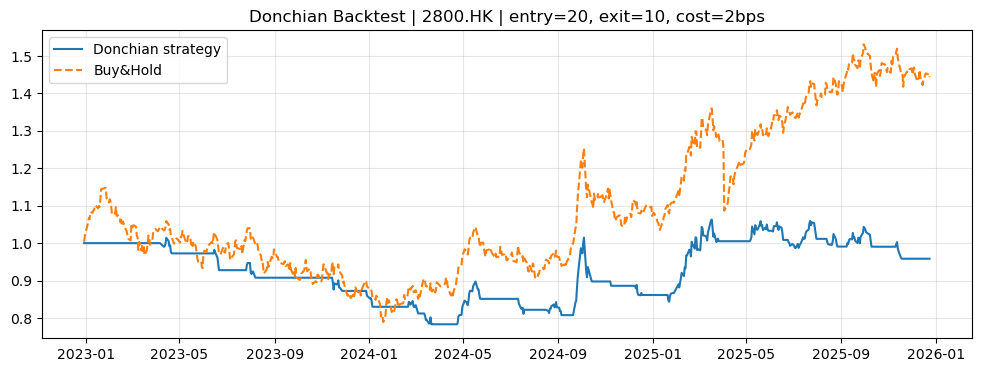

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fyp_trading.data import fetch_prices
from fyp_trading.backtest import equity_and_stats_from_positions
from fyp_trading.strategies import DonchianConfig, donchian_breakout_signal

TICKER = "2800.HK"
PERIOD = "3y"
INTERVAL = "1d"
TRANSACTION_COST_BP = 2.0
ALLOW_SHORT = False

CFG = DonchianConfig(entry=20, exit=10, allow_short=ALLOW_SHORT)

df = fetch_prices(TICKER, PERIOD, INTERVAL)
high = df["High"].copy()
low = df["Low"].copy()
close = df["Close"].copy()

pos = donchian_breakout_signal(high, low, CFG)

next_ret = np.log(close.shift(-1) / close)
simple_ret = (np.exp(next_ret) - 1.0).dropna()

bt_df, stats = equity_and_stats_from_positions(
    simple_return=simple_ret,
    position=pos.loc[simple_ret.index],
    transaction_cost_bp=TRANSACTION_COST_BP,
)

print(pd.Series(stats))

plt.figure(figsize=(12,4))
plt.plot(bt_df["strategy_equity"], label="Donchian strategy")
plt.plot(bt_df["buyhold_equity"], label="Buy&Hold", linestyle="--")
plt.title(f"Donchian Backtest | {TICKER} | entry={CFG.entry}, exit={CFG.exit}, cost={TRANSACTION_COST_BP:.0f}bps")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
